In [1]:
import tensorflow as tf


In [2]:
with tf.compat.v1.Session() as sess:
         frase = tf.constant('Olá, mundo')
         rodar = sess.run(frase)
print(rodar.decode('UTF-8'))

Olá, mundo


In [3]:
print(frase)

Tensor("Const:0", shape=(), dtype=string)


**The data for analises was catch from**
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [4]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

**First, see the len for each folder**

In [5]:
dataset_dir = os.path.join(os.getcwd(), 'cats_and_dogs_filtered')

dataset_train_dir = os.path.join(dataset_dir, 'train')
dataset_train_cats_len = len(os.listdir(os.path.join(dataset_train_dir, 'cats')))
dataset_train_dogs_len = len(os.listdir(os.path.join(dataset_train_dir, 'dogs')))

dataset_validation_dir = os.path.join(dataset_dir, 'validation')
dataset_validation_cats_len = len(os.listdir(os.path.join(dataset_validation_dir, 'cats')))
dataset_validation_dogs_len = len(os.listdir(os.path.join(dataset_validation_dir, 'dogs')))


print('Train Cats: %s' % dataset_train_cats_len)
print('Train Dogs: %s' % dataset_train_dogs_len)
print('Validation Cats: %s' % dataset_validation_cats_len)
print('Validation Dogs: %s' % dataset_validation_dogs_len)




Train Cats: 1000
Train Dogs: 1000
Validation Cats: 500
Validation Dogs: 500


**Now, we can be preprocess our images. The path you will take for this varies with the dataset. For this: scalling and color value (rgb, 255)**

In [6]:
image_width = 160
image_height = 160
image_color_channel = 3
image_color_channel_size = 255
image_size = (image_width, image_height)
image_shape = image_size + (image_color_channel,)

batch_size = 32
epochs = 20
learning_rate = 0.0001

class_names = ['cat', 'dog']

**Batch size is the number of features amount at a time that will bring from dataset, epochs is the number of times that i will go through dataset and learning rate is the taxe of learning**

In [7]:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True

)


Found 2000 files belonging to 2 classes.


**The image dataset from directory method return a dataset object basead in your path (in this case, train dir). In end. the quantitative is correct. Now, we will make the validation**

In [8]:
dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_validation_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True

)

Found 1000 files belonging to 2 classes.


**Now we have to make our test dataset, built from part of validation**

In [9]:
dataset_validation_cardinality = tf.data.experimental.cardinality(dataset_validation)
dataset_validation_batches = dataset_validation_cardinality // 5

dataset_test = dataset_validation.take(dataset_validation_batches)
dataset_validation = dataset_validation.skip(dataset_validation_batches)

print('Validation dataset cardinality: %d' % tf.data.experimental.cardinality(dataset_validation))
print('Test dataset cardinality: %d' % tf.data.experimental.cardinality(dataset_test))

Validation dataset cardinality: 26
Test dataset cardinality: 6


**We will plot some images from dataset**

In [10]:
def plot_dataset(dataset):
    
    plt.gcf().clear()
    plt.figure(figsize = (15, 15))
    
    for features, labels in dataset.take(1):   
        for i in range(9):
            plt.subplot(3, 3, i+1)
            plt.axis('off')
            
            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])
            
            

<Figure size 432x288 with 0 Axes>

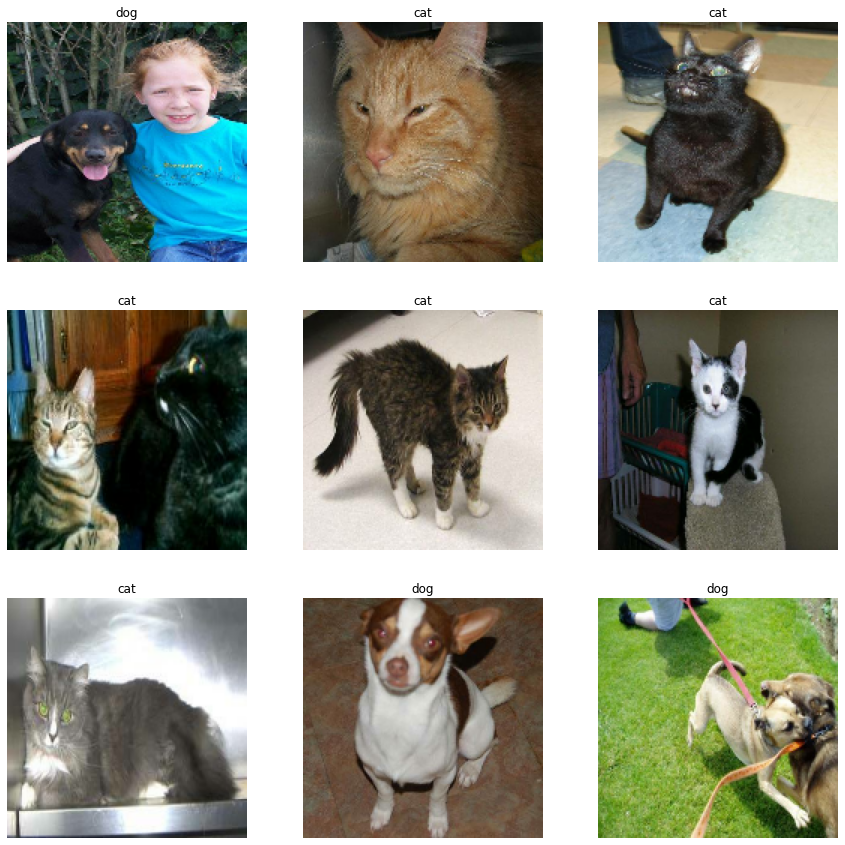

In [11]:
plot_dataset(dataset_test)

**FInnaly, we will make our convolutional model**

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(
        1. /image_color_channel_size,
        input_shape = image_shape
    ),
    tf.keras.layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')    
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 160, 160, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 64)        1

**our model is a sequencia type, applying each layer one after other. The first layer apply the rescale of our images, with normalization of values (0 until 255 per 0 until 1)**

**The second leyer is convolucional with size = 16. the kernel will be 3x3. padding add the zeros arround our feature. And relu is our function of ativation, that exclue all negative values.
The thirt layer (maxpooling) is a consolidation for activation convulational leyer**


In [13]:
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = epochs

)

Epoch 1/20
63/63 [==============================] - 69s 1s/step - loss: 0.6961 - accuracy: 0.5240 - val_loss: 0.6736 - val_accuracy: 0.5569
Epoch 2/20
63/63 [==============================] - 60s 940ms/step - loss: 0.6551 - accuracy: 0.6215 - val_loss: 0.6846 - val_accuracy: 0.5446
Epoch 3/20
63/63 [==============================] - 59s 940ms/step - loss: 0.6200 - accuracy: 0.6685 - val_loss: 0.5990 - val_accuracy: 0.6782
Epoch 4/20
63/63 [==============================] - 62s 974ms/step - loss: 0.5751 - accuracy: 0.7125 - val_loss: 0.5821 - val_accuracy: 0.6968
Epoch 5/20
63/63 [==============================] - 69s 1s/step - loss: 0.5371 - accuracy: 0.7460 - val_loss: 0.5691 - val_accuracy: 0.7017
Epoch 6/20
63/63 [==============================] - 63s 1s/step - loss: 0.5092 - accuracy: 0.7545 - val_loss: 0.5630 - val_accuracy: 0.7079
Epoch 7/20
63/63 [==============================] - 62s 987ms/step - loss: 0.5029 - accuracy: 0.7595 - val_loss: 0.5583 - val_accuracy: 0.7104
Epoch 8/

**Now we will test it**

In [21]:
def plot_dataset_predictions(dataset):
    
    features, labels = dataset.as_numpy_iterator().next()
    
    predictions = model.predict_on_batch(features).flatten()
    predictions = tf.where(predictions < 0.5, 0, 1)
    
    print('Labels:      %s' % labels)
    print('Predictions: %s' % predictions.numpy())
    
    plt.gcf().clear()
    plt.figure(figsize = (15, 15))
    
    for i in range(9):
        
        plt.subplot(3, 3, i+1)
        plt.axis('off')
        
        plt.imshow(features[i].astype('uint8'))
        plt.title(class_names[predictions[i]])

Labels:      [0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1]
Predictions: [0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0]


<Figure size 432x288 with 0 Axes>

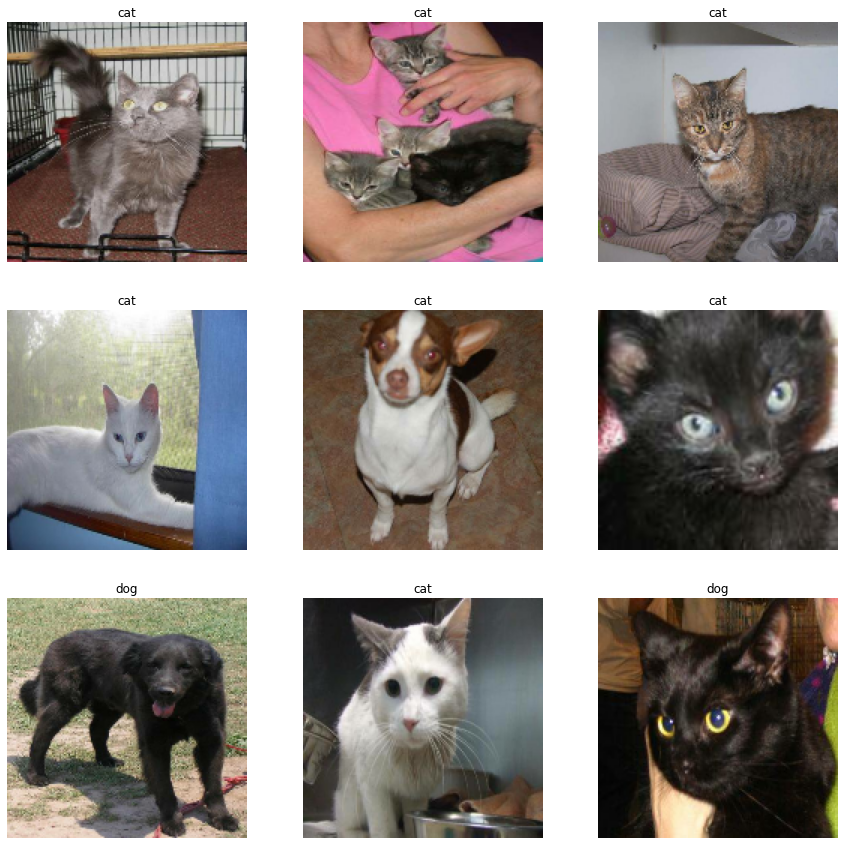

In [22]:
plot_dataset_predictions(dataset_test)

**if you decide save your model or load, you can use the next method:**

In [23]:
model.save('path/to/model')

INFO:tensorflow:Assets written to: path/to/model\assets


INFO:tensorflow:Assets written to: path/to/model\assets


In [25]:
model = tf.keras.models.load_model('path/to/model')

**you maybe wanted see the quality of your model. We will go plot and see this performance during your process**

In [31]:
def plot_model():
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(epochs)
    
    plt.gcf().clear()
    plt.figure(figsize = (15, 8))
    
    plt.subplot(1, 2, 1)
    plt.title('Training and validation accuracy')
    plt.plot(epochs_range, accuracy, label =  'Training accuracy')
    plt.plot(epochs_range, val_accuracy, label =  'Validation accuracy')   
    plt.legend(loc = 'lower right')
    
    plt.subplot(1, 2, 2)
    plt.title('Training and validation loss')
    plt.plot(epochs_range, loss, label =  'Training loss')
    plt.plot(epochs_range, val_loss, label =  'Validation loss')   
    plt.legend(loc = 'lower right')  
    
    plt.show()
    

<Figure size 432x288 with 0 Axes>

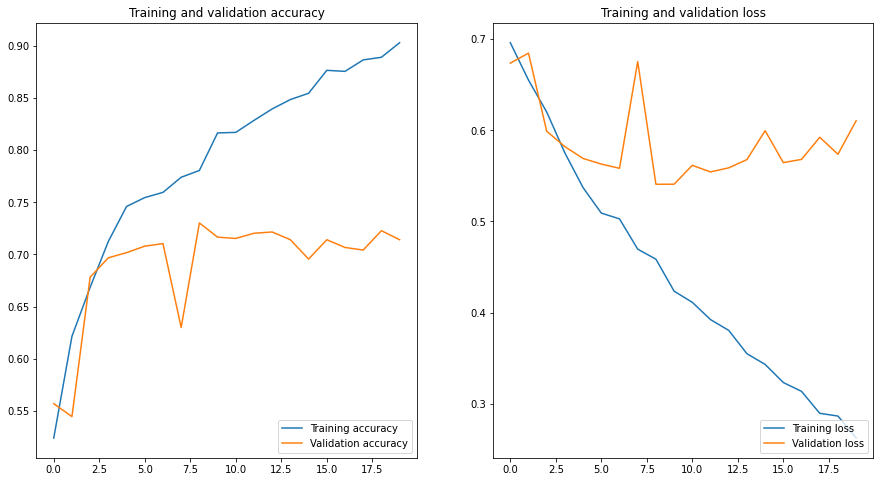

In [32]:
plot_model()